<a href="https://colab.research.google.com/github/LivenetsTatiana/works/blob/main/MachineLearning/GeometricShapeRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Распознование геометрических фигур.<center/>**
**Цель**: поистроить нейронную сеть для распознования фигур по картинкам




In [ ]:
# необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras import layers, models, utils
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation

from tensorflow.keras.datasets import mnist
from keras.utils.image_utils import load_img

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Загрузка данных

Подключение к kaggle для взятия данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d reevald/geometric-shapes-mathematics

 96% 112M/117M [00:01<00:00, 140MB/s] 
100% 117M/117M [00:01<00:00, 106MB/s]


In [ ]:
! unzip geometric-shapes-mathematics.zip

In [ ]:
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

In [ ]:
Name=[]
for file in os.listdir(train_dir):
    Name+=[file]
print(Name)
print(len(Name))

['trapezoid', 'rectangle', 'rhombus', 'square', 'triangle', 'kite', 'circle', 'parallelogram']
8


In [ ]:
N=list(range(len(Name)))
mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

# Нормализация данных

In [ ]:
trainset=[]
count=0
for file in os.listdir(train_dir):
    path=os.path.join(train_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(80,80))
        image=img_to_array(image)
        image=image/255.0
        trainset+=[[image,count]]
    count=count+1

In [ ]:
testset=[]
count=0
for file in os.listdir(test_dir):
    path=os.path.join(test_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(80,80))
        image=img_to_array(image)
        image=image/255.0
        testset+=[[image,count]]
    count=count+1

In [ ]:
trainX,trainY0=zip(*trainset)
testX,testY0=zip(*testset)

# Векторизация меток класса

In [ ]:
labels1=to_categorical(trainY0)
trainY=np.array(labels1)

In [ ]:
labels2=to_categorical(testY0)
testY=np.array(labels2)

In [ ]:
trainX=np.array(trainX)
testX=np.array(testX)

In [ ]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(12000, 80, 80, 3)
(4000, 80, 80, 3)
(12000, 8)
(4000, 8)


In [ ]:
print(testY[0])

[1. 0. 0. 0. 0. 0. 0. 0.]


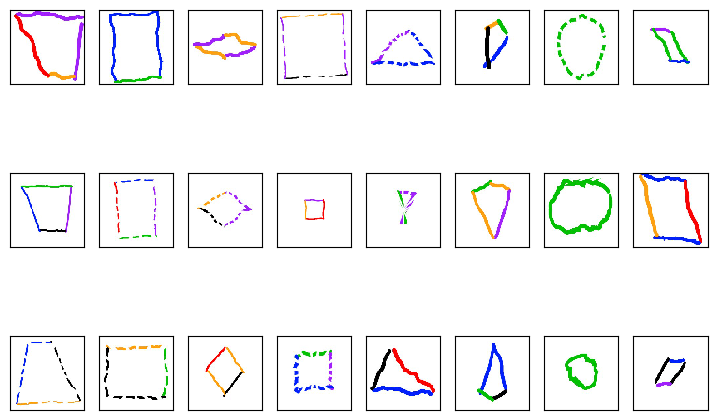

In [ ]:
# отображаем часть данных датасета
fig, axs = plt.subplots(nrows=3, ncols=8, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
for j in range(3):
  for i in range(8):
    axs[j, i].imshow(trainX[j+i*1500], cmap='binary', interpolation='nearest')

# Построение модели (учитывается цвет)





In [ ]:
# создание модели
model = Sequential()
# Добавляем слой
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(80,80,3)))
# kernel_size=3 — размер ядра 3х3. Функция активации 'relu' ( Rectified Linear Activation ),
# 64 это число ядер свертки( сколько признаком будем искать)
# Второй сверточный слой
model.add(Conv2D(32, kernel_size=3, activation='relu'))
# Создаем вектор для полносвязной сети.
model.add(Flatten()) # Flatten() – слой, преобразующий 2D-данные в 1D-данные.
# Создадим однослойный перцептрон
model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 184832)            0         
                                                                 
 dense (Dense)               (None, 8)                 1478664   
                                                                 
Total params: 1,498,920
Trainable params: 1,498,920
Non-trainable params: 0
_________________________________________________________________


Метрика - точность, функция потерь - categorical_crossentropy, оптимизация - adam

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Обучение модели

In [ ]:
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5)

Epoch 1/5
375/375 [==============================] - 442s 1s/step - loss: 1.0338 - accuracy: 0.6536 - val_loss: 0.5835 - val_accuracy: 0.7972
Epoch 2/5
375/375 [==============================] - 425s 1s/step - loss: 0.3380 - accuracy: 0.8873 - val_loss: 0.4790 - val_accuracy: 0.8438
Epoch 3/5
375/375 [==============================] - 434s 1s/step - loss: 0.1381 - accuracy: 0.9582 - val_loss: 0.5249 - val_accuracy: 0.8460
Epoch 4/5
375/375 [==============================] - 480s 1s/step - loss: 0.0610 - accuracy: 0.9818 - val_loss: 0.6045 - val_accuracy: 0.8397
Epoch 5/5
375/375 [==============================] - 484s 1s/step - loss: 0.0275 - accuracy: 0.9929 - val_loss: 0.6081 - val_accuracy: 0.8475


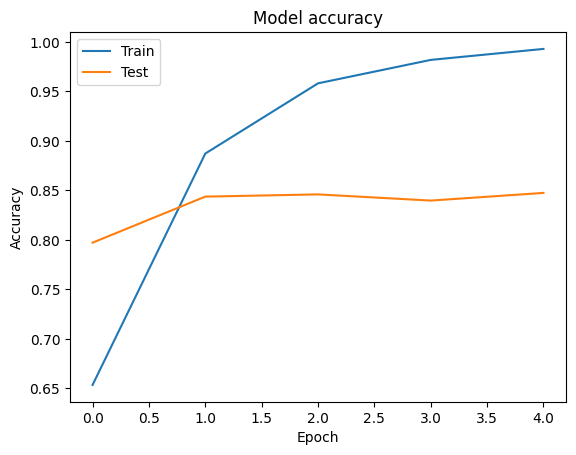

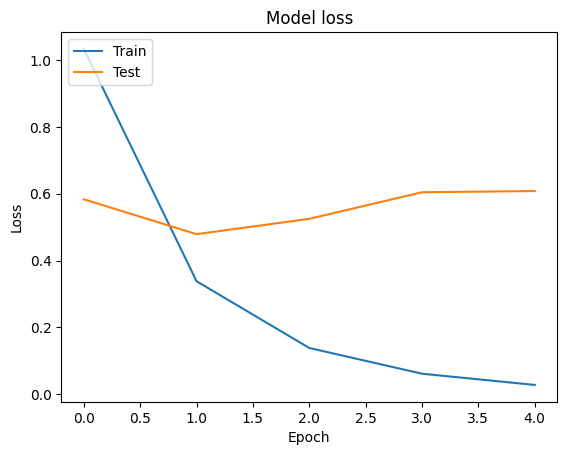

125/125 [==============================] - 34s 268ms/step
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
plt.plot (history.history['accuracy'])

plt.plot (history.history['val_accuracy'])
plt.title('Model accuracy')

plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')

plt.legend(['Train', 'Test'], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot (history.history['loss'])

plt.plot (history.history['val_loss'])
plt.title('Model loss')

plt.ylabel ("Loss")

plt.xlabel ("Epoch")

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


ynew = (model.predict(testX) > 0.5).astype("int32")
print(ynew)

In [ ]:
pred2=model.predict(testX)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)
    PRED+=[value2]

125/125 [==============================] - 32s 259ms/step
(4000, 8)


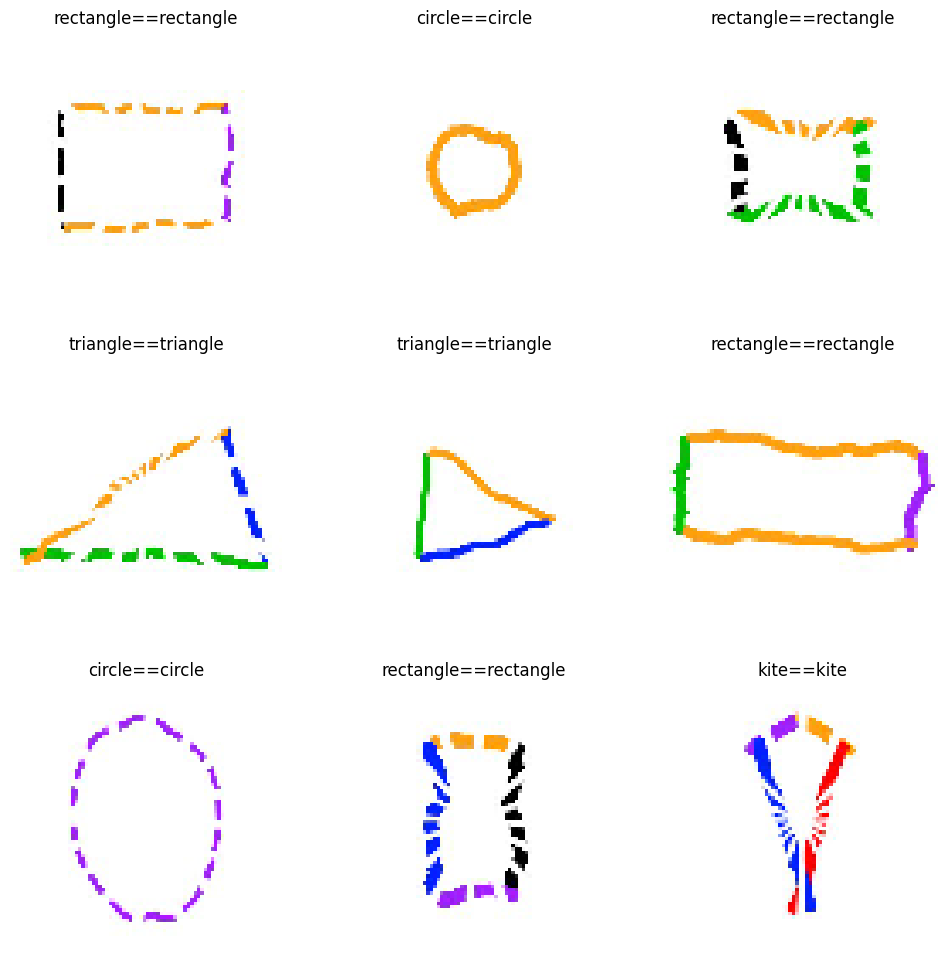

In [ ]:
N=list(range(len(testX)))
random.seed(2022)
random.shuffle(N)
fig, axs = plt.subplots(3,3,figsize=(12,12))
for i in range(9):
    r=i//3
    c=i%3
    ax=axs[r][c].axis("off")
    actual=reverse_mapping[testY0[N[i]]]
    predict=reverse_mapping[PRED[N[i]]]
    ax=axs[r][c].set_title(actual+'=='+predict)
    ax=axs[r][c].imshow(testX[N[i]])
plt.show()

# Построение модели 2 (чб)

In [ ]:
trainset=[]
count=0
for file in os.listdir(train_dir):
    path=os.path.join(train_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), color_mode="grayscale", target_size=(80,80))
        image=img_to_array(image)
        image=image/255.0
        trainset+=[[image,count]]
    count=count+1

In [ ]:
testset=[]
count=0
for file in os.listdir(test_dir):
    path=os.path.join(test_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), color_mode="grayscale", target_size=(80,80))
        image=img_to_array(image)
        image=image/255.0
        testset+=[[image,count]]
    count=count+1

In [ ]:
trainX,trainY0=zip(*trainset)
testX,testY0=zip(*testset)

In [ ]:
labels1=to_categorical(trainY0)
trainY=np.array(labels1)

In [ ]:
labels2=to_categorical(testY0)
testY=np.array(labels2)

In [ ]:
trainX=np.array(trainX)
testX=np.array(testX)

In [ ]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(12000, 80, 80, 1)
(4000, 80, 80, 1)
(12000, 8)
(4000, 8)


In [ ]:
print(testY[0])

[1. 0. 0. 0. 0. 0. 0. 0.]


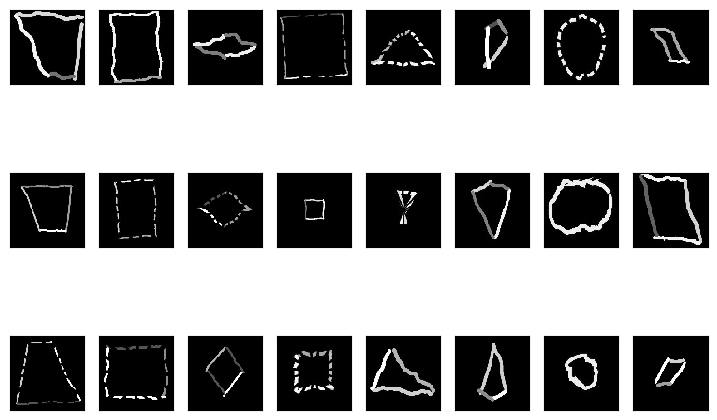

In [ ]:
# отображаем часть данных датасета
fig, axs = plt.subplots(nrows=3, ncols=8, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
for j in range(3):
  for i in range(8):
    axs[j, i].imshow(trainX[j+i*1500], cmap='binary', interpolation='nearest')

In [ ]:
# создание модели
model2 = Sequential()
# Добавляем слой
model2.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(80,80,1)))
# kernel_size=3 — размер ядра 3х3. Функция активации 'relu' ( Rectified Linear Activation ),
# 64 это число ядер свертки( сколько признаком будем искать)
# Второй сверточный слой
model2.add(Conv2D(32, kernel_size=3, activation='relu'))
# Создаем вектор для полносвязной сети.
model2.add(Flatten()) # Flatten() – слой, преобразующий 2D-данные в 1D-данные.
# Создадим однослойный перцептрон
model2.add(Dense(8, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 78, 78, 64)        640       
                                                                 
 conv2d_17 (Conv2D)          (None, 76, 76, 32)        18464     
                                                                 
 flatten_9 (Flatten)         (None, 184832)            0         
                                                                 
 dense_10 (Dense)            (None, 8)                 1478664   
                                                                 
Total params: 1,497,768
Trainable params: 1,497,768
Non-trainable params: 0
_________________________________________________________________


Метрика - точность, функция потерь - categorical_crossentropy, оптимизация - adam

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Обучение модели 2

In [ ]:
history = model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=5)

Epoch 1/5
375/375 [==============================] - 418s 1s/step - loss: 1.0697 - accuracy: 0.6428 - val_loss: 0.5762 - val_accuracy: 0.7930
Epoch 2/5
375/375 [==============================] - 416s 1s/step - loss: 0.3746 - accuracy: 0.8732 - val_loss: 0.4691 - val_accuracy: 0.8382
Epoch 3/5
375/375 [==============================] - 418s 1s/step - loss: 0.1919 - accuracy: 0.9402 - val_loss: 0.4783 - val_accuracy: 0.8472
Epoch 4/5
375/375 [==============================] - 420s 1s/step - loss: 0.0945 - accuracy: 0.9719 - val_loss: 0.5143 - val_accuracy: 0.8457
Epoch 5/5
375/375 [==============================] - 412s 1s/step - loss: 0.0478 - accuracy: 0.9861 - val_loss: 0.5827 - val_accuracy: 0.8465


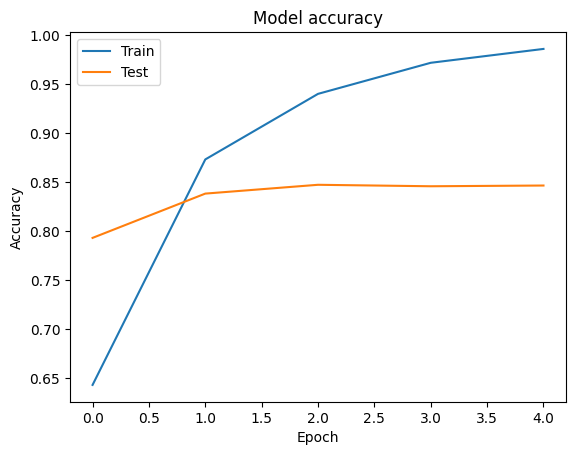

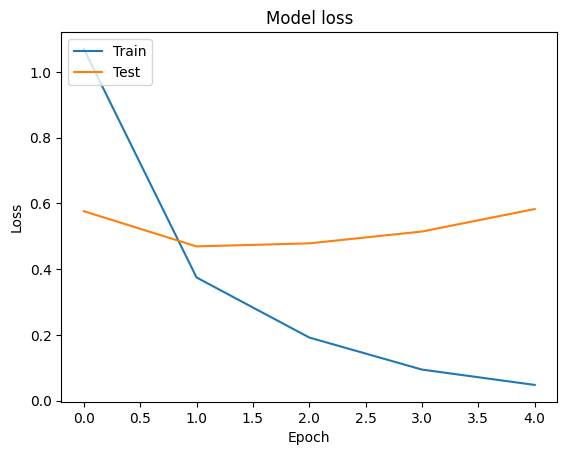

125/125 [==============================] - 29s 228ms/step
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
plt.plot (history.history['accuracy'])

plt.plot (history.history['val_accuracy'])
plt.title('Model accuracy')

plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')

plt.legend(['Train', 'Test'], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot (history.history['loss'])

plt.plot (history.history['val_loss'])
plt.title('Model loss')

plt.ylabel ("Loss")

plt.xlabel ("Epoch")

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


ynew = (model2.predict(testX) > 0.5).astype("int32")
print(ynew)

# **Вывод**

Построены 2 модели сверточных нейронных сетей, которые принимают на вход массив, задающий фигуры 80*80 пикселей и выдает массив с 0 и 1, индекс положения 1 в котром - фигура, которая была распознана моделью.

Модель 1 учитывала цвета изображений с фигурами и показала лучшую точность 0,9929, чем модель2, которая училась и тестировалась на чб изображениях (точность 0,9861)